## Obtaining Census Data for Reproduction of Spielman Paper

In [134]:
import pygris
from pygris.utils import shift_geometry
from pygris.utils import erase_water
import cenpy
import pandas as pd
import re

In [ ]:
cenpy.remote.APIConnection.query?

In [ ]:
data = con.query(cols=cols, geo_unit=g_unit, geo_filter=g_filter, apikey="e616ed8d31a4c6246c87db97b25d249b83da19ff")

In [ ]:
usa = products.ACS(2013).from_place('Chicago, IL', level='tract',
                                        variables=['B00002*', 'B01002H_001E'])

# I think the following is what I want

### Subject tables

In [ ]:
import pygris
import pandas as pd
import geopandas as gpd
from pygris.utils import shift_geometry
from pygris.data import get_census
import numpy as np

In [ ]:
variables = ["S0601_C01_001E", # total pop (CHECKED)
             "S0601_C01_017E", # total asian (FOR SOME REASON, PERCENTAGE. ALSO 3RD LINE OFF)
             "S0601_C01_015E", # total black (FOR SOME REASON THIS APPEARS TO BE A PERCENTAGE)
             "S0601_C01_021E", # total latinx
             "S0601_C01_016E", # total native
             "S0601_C01_002E", # total under 5
             "S0601_C01_008E", # total 65-74
             "S0601_C01_009E", # total 75+
            
                 # Percent Children Living in 2-Parent Families
             # unsure about this section -- seems like multiple entries of both of the folowing
             "S0901_C01_001E", # total children (under 18 yrs)
             "S0901_C02_001E", # total children in married-couple households
             
             "S0601_C01_010E", # median age (CHECKED)
                 # Percent Households Receiving Social Security Benefits
             "S0601_C01_048E", # total for which poverty status known
             "S0601_C01_049E", # total below 100% of poverty line
             # Percent Households Earning over $200,000 Annually:
             "S2503_C01_001E", # occupied households number
             "S2503_C01_012E", # total occuppied households with $150,000 income or more
             "S0601_C01_047E", # median income (does per capita imply mean?)
                 # Percent Speaking English as a Second Language with Limited English Proficiency
             "S0601_C01_012E", # total female
             
                 # Percent Female Headed Households
             "S1101_C04_001E", # is this what we're looking for??? Female householder, no husband present, family household!!Estimate!!Total households
             "S2501_C01_019E", # also this option??? Occupied housing units!!Estimate!!HOUSEHOLD TYPE (INCLUDING LIVING ALONE) AND AGE OF HOUSEHOLDER!!Family households!!Other family!!Female householder, no husband present
                 # Nursing Home Residents Per Capita
                 # Hospitals per Capita (County Level ONLY) 
                 # Percent of Population without Health Insurance
             "S2701_C01_001E", # Total!!Estimate!!Total civilian noninstitutionalized population
             "S2701_C01_046E", # Total!!Estimate!!PERCENT IMPUTED!!Health insurance coverage
             "S2701_C02_001E", # Number Uninsured!!Estimate!!Total civilian noninstitutionalized population
             
             
             "S0601_C01_032E", # check this: think it's the total for which they have educational information on
             "S0601_C01_033E", # total with less than 12th Grade Education
                 # Percent Civilian Unemployment
                 # People per Unit

                 # Percent Renters
                     # which one?
             "S2501_C01_001E", # total occupied housing units
             "S1101_C01_001E", # total households or S1101_C01_009E?
                      # which one?
             "S1101_C01_020E", # total renter-occupied housing units (used for % renters??) 
             "S2501_C03_001E", # "Renter-occupied housing units!!Estimate!!Occupied housing units"
            
                 # Median Housing Value
                 # Median Gross Rent
                 # Percent Mobile Homes
             "S1101_C01_018E", # total number of mobile homes
                 # Percent Employment in Extractive Industries
                 # Percent Employment in Service Industry
                 # Percent Female Participation in Labor Force
             # Percent of Housing Units with No Car
             "S2504_C01_001E", # total occupied housing units
             "S2504_C01_026E", # total occupied housing units with no vehicle available
             "S0501_C01_016E"
             
                 # Percent Unoccupied Housing Units
                 # Percent of All Households Spending More than 40% of Their Income on Housing Expenses (Tract Level ONLY)
                ]

In [ ]:
counties_pop = get_census(dataset = "acs/acs5/subject", # dataset name on the Census API you are connecting to; find datasets at https://api.census.gov/data.html
                        variables = variables, # string (or list of strings) of desired vars. For the 2021 5-year ACS Data Profile, those variable IDs are found at https://api.census.gov/data/2021/acs/acs5/profile/variables.html.
                        year = 2012, # year of your data (or end-year for a 5-year ACS sample)
                        params = { # dict of query parameters to send to the API.
                          "for": "county:*"},#,
                          # "in": "state:36"},
                        guess_dtypes = True,
                        return_geoid = True)

In [ ]:
# Data manipulations
counties_pop["BLACK"] = counties_pop["S0601_C01_015E"]/counties_pop["S0601_C01_001E"]

In [ ]:
from pygris import counties
counties_shp = counties(cb = True,
                    year = 2021, cache = True)
# counties_shp.plot();

In [ ]:
# Joining the data and mapping it
counties = counties_shp.merge(counties_pop, how = "inner", on = "GEOID")
counties_pretty = shift_geometry(counties)
counties_pretty.plot(column = "S0601_C01_010E", legend = True, figsize = (10, 10)); # believe plot() from gpd

# START HERE NOW!

### Detailed tables (actually what I want)

In [1]:
import pygris
import pandas as pd
import geopandas as gpd
from pygris.utils import shift_geometry
from pygris.data import get_census
import numpy as np
from pygris import counties

In [ ]:
# ACS variables (alternatives)


# I didn't understand QURBRURX
db1['POPDENS'] = db.ACS12_5yr_B01003001 / (db.SE_T02A_002 * 1.)



# Decennial variables (original)
db1['MEDAGE'] = db.SF1_P0130001
db1['BLACK'] = (db.SF1_P0030003 * 1.) / db.SF1_P0010001
db1['QNATAM'] = (db.SF1_P0030004 * 1.) / db.SF1_P0010001
db1['QASIAN'] = (db.SF1_P0030005 * 1.) / db.SF1_P0010001
db1['QHISP'] = (db.SF1_P0040003 * 1.) / db.SF1_P0010001
db1['QAGEDEP'] = ((db.SF1_P0120003 + db.SF1_P0120027 + db.SF1_P0120020 +
                   db.SF1_P0120021 + db.SF1_P0120022 + db.SF1_P0120023 +
                   db.SF1_P0120024 + db.SF1_P0120025 + db.SF1_P0120044 +
                   db.SF1_P0120045 + db.SF1_P0120046 + db.SF1_P0120047 +
                   db.SF1_P0120048 + db.SF1_P0120049) * 1.) / db.SF1_P0010001
db1['PPUNIT'] = db.SF1_H0100001 / (db.SF1_H0030002 * 1.)
db1['PRENTER'] = (db.SF1_H0040004 * 1.) / db.SF1_H0010001
db1['QNRRES'] = (db.SF1_P0420005 * 1.) / db.SF1_P0010001
db1['QFEMALE'] = (db.SF1_P0120026 * 1.) / db.SF1_P0010001
db1['QFHH'] = (db.SF1_P0190014 * 1.) / db.SF1_P0180001
db1['QUNOCCHU'] = ((db.SF1_H0010001 - db.SF1_H0030002) * 1.) / db.SF1_H0010001

# Decennial variables (alternatives)
db1['BLACK_ALT'] = (db.SF1_P0050004 * 1.) / db.SF1_P0010001  # exclude hispanic
db1['QNATAM_ALT'] = (db.SF1_P0050005 * 1.) / \
                    db.SF1_P0010001  # exclude hispanic
db1['QASIAN_ALT'] = (db.SF1_P0050006 * 1.) / \
                    db.SF1_P0010001  # exclude hispanic
db1['QNRRES_ALT'] = (db.SF1_P0430023 + db.SF1_P0430054 * 1.) / \
                    db.SF1_P0010001  # 65 and over living in group quarters
# same value, simplified computation
db1['QUNOCCHU_ALT'] = (db.SF1_H0030003 * 1.) / db.SF1_H0030001

# ofc still need to do the calculations for standardization
# also need to do all standard error calculations and imputation


In [ ]:
dec_variables = [
    
    
    
    
    
    
    
    
    
    
]

In [65]:
acs_variables = [
    "B01002_001E", # median age
    "B03002_001E", # total population (demoninator for race)
    "B03002_004E", # total black
    "B03002_005E", # total native american
    "B03002_006E", # total asian
    "B03002_012E", # total latinx
    # "B06001_002E", # total under 5
    "B09020_001E", # total above 65 -- they got from different section than under 5. Try summing B06001_011E + B06001_012E and see if result is equivalent?
    "B01003_001E", # total population (denominator for age, sex) -- check if this is the best denominator for age
    "B25008_001E", # total population in occupied housing units?
    "B25002_002E", # total occupied housing units? Believe they divide B25008_001E/B25002_002E to get people per 
    "B25003_003E", # total renter occupied housing units?
    "B25002_001E", # total housing units for which occupancy status is known?
    "B09020_021E", # total 65+ living in group quarters
    "B01001_026E", # total female
    "B11001_006E", # total female-headed family households
    "B11001_001E", # total households (denominator for pct female-headed)
    "B25002_003E", # total vacant housing units?
    "B19025_001E", # aggregate household income
    "B16004_029E", # total speak spanish, speak english not well ages 18-64
    "B16004_030E", # total speak spanish, speak english not at all ages 18-64
    "B16004_034E", # total speak other indo-european languages, speak english not well ages 18-64
    "B16004_035E", # total speak other indo-european languages, speak english not at all ages 18-64
    "B16004_039E", # total speak asian languages, speak english not well ages 18-64
    "B16004_040E", # total speak asian languages, speak english not at all ages 18-64
    "B16004_044E", # total speak other languages, speak english not well ages 18-64
    "B16004_045E", # total speak other languages, speak english not at all ages 18-64
    "B16004_051E", # total speak spanish, speak english not well ages 65+
    "B16004_052E", # total speak spanish, speak english not at all ages 65+
    "B16004_056E", # total speak other indo-european languages, speak english not well ages 65+
    "B16004_057E", # total speak other indo-european languages, speak english not at all ages 65+
    "B16004_061E", # total speak asian languages, speak english not well ages 65+
    "B16004_062E", # total speak asian languages, speak english not at all ages 65+
    "B16004_066E", # total speak other languages, speak english not well ages 65+
    "B16004_067E", # total speak other languages, speak english not at all ages 65+
    "B16004_024E", # total ages 18-64 for language category
    "B16004_046E", # total 65+ for language category
    "B16004_025E", # total ages 18-64 that speak only english
    "B16004_047E", # total 65+ that speak only english
    "B23022_025E", # total male unemployed for last 12 months -- did they not have the stat available without the male/female cross tabulation?
    "B23022_049E", # total female unemployed for last 12 months
    "B23022_001E", # total for unemployment by sex stats
    "B17021_002E", # total pop below poverty level
    "B17021_001E", # total pop for which poverty info available (denominator for poverty pct)
    "B25024_010E", # number of mobile home housing units in structure
    "B25024_001E", # total units in structure
    "B15002_003E", # total male no schooling completed
    "B15002_004E", # total male nursery to 4th grade
    "B15002_005E", # total male 5th and 6th grade
    "B15002_006E", # total male 7th and 8th grade
    "B15002_007E", # total male 9th grade
    "B15002_008E", # total male 10th grade
    "B15002_009E", # total male 11th grade
    "B15002_010E", # total male 12th grade, no diploma
    "B15002_020E", # total female no schooling completed
    "B15002_021E", # total female nursery to 4th grade
    "B15002_022E", # total female 5th and 6th grade
    "B15002_023E", # total female 7th and 8th grade
    "B15002_024E", # total female 9th grade
    "B15002_025E", # total female 10th grade
    "B15002_026E", # total female 11th grade
    "B15002_027E", # total female 12th grade, no diploma
    "B15002_001E", # total sex by educational attainment (denominator for education)
    "C24010_038E", # total female employed
    "C24010_001E", # total for which sex and occupation -- including employment status -- known (a denominator)
    "C24030_003E", # total male extractive industries
    "C24030_030E", # total female extractive industries
    "C24030_001E", # total for which sex and industry known
    "C24010_019E", # total male in service occupations
    "C24010_055E", # total female in service occupations
    "B19055_002E", # total households(?) with social security income
    "B19055_001E", # total households(?) for which social security income status known
    "B25044_003E", # total owner occupied no vehicle available
    "B25044_010E", # total rental occupied no vehicle available
    "B25044_001E", # total for which tenure by vehicle available known
    "B09002_002E", # total children in married couple families
    "B09002_001E", # total children by family type and age (a denominator)
    "B19001_017E", # total households over 200k income
    "B11001_001E", # total households (denominator -- is there an alternative from same category? B19001_001E?)
    "B06007_005E", # total speak spanish, speak english less than very well
    "B06007_008E", # total speak another language, speak english less than very well
    "B06007_001E", # total speak another language (a denominator)
    "B16010_002E", # total less than high school
    "B16010_001E", # total for which education, employment, language at home known (a denominator)
    "C24050_002E", # total in extractive industries
    "C24050_001E", # total for which industry known (a denominator)
    "C24050_029E", # total in service occupations
    "B08201_002E", # total households no vehicle available
    "B08201_001E", # total households for which vehicle status and family size known (a denominator)
    "B25064_001E", # median gross rent
    "B25077_001E", # median value (of what? housing?)
]
    
spielman_acs_variables = [
    "ACS12_5yr_B01002001", # median age
    "ACS12_5yr_B03002001", # total population (demoninator for race)
    "ACS12_5yr_B03002004", # total black
    "ACS12_5yr_B03002005", # total native american
    "ACS12_5yr_B03002006", # total asian
    "ACS12_5yr_B03002012", # total latinx
    # "ACS12_5yr_B06001002", # total under 5 
    "ACS12_5yr_B09020001", # total above 65 -- they got from different section than under 5. Try summing B06001_011E + B06001_012E and see if result is equivalent?
    "ACS12_5yr_B01003001", # total population (denominator for age, sex) -- check if this is the best denominator for age
    "ACS12_5yr_B25008001", # total population in occupied housing units?
    "ACS12_5yr_B25002002", # total occupied housing units? Believe they divide B25008_001E/B25002_002E to get people per 
    "ACS12_5yr_B25003003", # total renter occupied housing units?
    "ACS12_5yr_B25002001", # total housing units for which occupancy status is known?
    "ACS12_5yr_B09020021", # total 65+ living in group quarters
    "ACS12_5yr_B01001026", # total female
    "ACS12_5yr_B11001006", # total female-headed family households
    "ACS12_5yr_B11001001", # total households (denominator for pct female-headed)
    "ACS12_5yr_B25002003", # total vacant housing units?
    "ACS12_5yr_B19025001", # aggregate household income
    "ACS12_5yr_B16004029", # total speak spanish, speak english not well ages 18-64
    "ACS12_5yr_B16004030", # total speak spanish, speak english not at all ages 18-64
    "ACS12_5yr_B16004034", # total speak other indo-european languages, speak english not well ages 18-64
    "ACS12_5yr_B16004035", # total speak other indo-european languages, speak english not at all ages 18-64
    "ACS12_5yr_B16004039", # total speak asian languages, speak english not well ages 18-64
    "ACS12_5yr_B16004040", # total speak asian languages, speak english not at all ages 18-64
    "ACS12_5yr_B16004044", # total speak other languages, speak english not well ages 18-64
    "ACS12_5yr_B16004045", # total speak other languages, speak english not at all ages 18-64
    "ACS12_5yr_B16004051", # total speak spanish, speak english not well ages 65+
    "ACS12_5yr_B16004052", # total speak spanish, speak english not at all ages 65+
    "ACS12_5yr_B16004056", # total speak other indo-european languages, speak english not well ages 65+
    "ACS12_5yr_B16004057", # total speak other indo-european languages, speak english not at all ages 65+
    "ACS12_5yr_B16004061", # total speak asian languages, speak english not well ages 65+
    "ACS12_5yr_B16004062", # total speak asian languages, speak english not at all ages 65+
    "ACS12_5yr_B16004066", # total speak other languages, speak english not well ages 65+
    "ACS12_5yr_B16004067", # total speak other languages, speak english not at all ages 65+
    "ACS12_5yr_B16004024", # total ages 18-64 for language category
    "ACS12_5yr_B16004046", # total 65+ for language category
    "ACS12_5yr_B16004025", # total ages 18-64 that speak only english
    "ACS12_5yr_B16004047", # total 65+ that speak only english
    "ACS12_5yr_B23022025", # total male unemployed for last 12 months -- did they not have the stat available without the male/female cross tabulation?
    "ACS12_5yr_B23022049", # total female unemployed for last 12 months
    "ACS12_5yr_B23022001", # total for unemployment by sex stats
    "ACS12_5yr_B17021002", # total pop below poverty level
    "ACS12_5yr_B17021001", # total pop for which poverty info available (denominator for poverty pct)
    "ACS12_5yr_B25024010", # number of mobile home housing units in structure
    "ACS12_5yr_B25024001", # total units in structure
    "ACS12_5yr_B15002003", # total male no schooling completed
    "ACS12_5yr_B15002004", # total male nursery to 4th grade
    "ACS12_5yr_B15002005", # total male 5th and 6th grade
    "ACS12_5yr_B15002006", # total male 7th and 8th grade
    "ACS12_5yr_B15002007", # total male 9th grade
    "ACS12_5yr_B15002008", # total male 10th grade
    "ACS12_5yr_B15002009", # total male 11th grade
    "ACS12_5yr_B15002010", # total male 12th grade, no diploma
    "ACS12_5yr_B15002020", # total female no schooling completed
    "ACS12_5yr_B15002021", # total female nursery to 4th grade
    "ACS12_5yr_B15002022", # total female 5th and 6th grade
    "ACS12_5yr_B15002023", # total female 7th and 8th grade
    "ACS12_5yr_B15002024", # total female 9th grade
    "ACS12_5yr_B15002025", # total female 10th grade
    "ACS12_5yr_B15002026", # total female 11th grade
    "ACS12_5yr_B15002027", # total female 12th grade, no diploma
    "ACS12_5yr_B15002001", # total sex by educational attainment (denominator for education)
    "ACS12_5yr_C24010038", # total female employed
    "ACS12_5yr_C24010001", # total for which sex and occupation -- including employment status -- known (a denominator)
    "ACS12_5yr_C24030003", # total male extractive industries
    "ACS12_5yr_C24030030", # total female extractive industries
    "ACS12_5yr_C24030001", # total for which sex and industry known
    "ACS12_5yr_C24010019", # total male in service occupations
    "ACS12_5yr_C24010055", # total female in service occupations
    "ACS12_5yr_B19055002", # total households(?) with social security income
    "ACS12_5yr_B19055001", # total households(?) for which social security income status known
    "ACS12_5yr_B25044003", # total owner occupied no vehicle available
    "ACS12_5yr_B25044010", # total rental occupied no vehicle available
    "ACS12_5yr_B25044001", # total for which tenure by vehicle available known
    "ACS12_5yr_B09002002", # total children in married couple families
    "ACS12_5yr_B09002001", # total children by family type and age (a denominator)
    "ACS12_5yr_B19001017", # total households over 200k income
    "ACS12_5yr_B11001001", # total households (denominator -- is there an alternative from same category? B19001_001E?)
    "ACS12_5yr_B06007005", # total speak spanish, speak english less than very well
    "ACS12_5yr_B06007008", # total speak another language, speak english less than very well
    "ACS12_5yr_B06007001", # total speak another language (a denominator)
    "ACS12_5yr_B16010002", # total less than high school
    "ACS12_5yr_B16010001", # total for which education, employment, language at home known (a denominator)
    "ACS12_5yr_C24050002", # total in extractive industries
    "ACS12_5yr_C24050001", # total for which industry known (a denominator)
    "ACS12_5yr_C24050029", # total in service occupations
    "ACS12_5yr_B08201002", # total households no vehicle available
    "ACS12_5yr_B08201001", # total households for which vehicle status and family size known (a denominator)
    "ACS12_5yr_B25064001", # median gross rent
    "ACS12_5yr_B25077001", # median value (of what? housing?)
]
    
# *looks like they calculate some things in a slightly slower way and then recalculate them with fewer vars
    
    


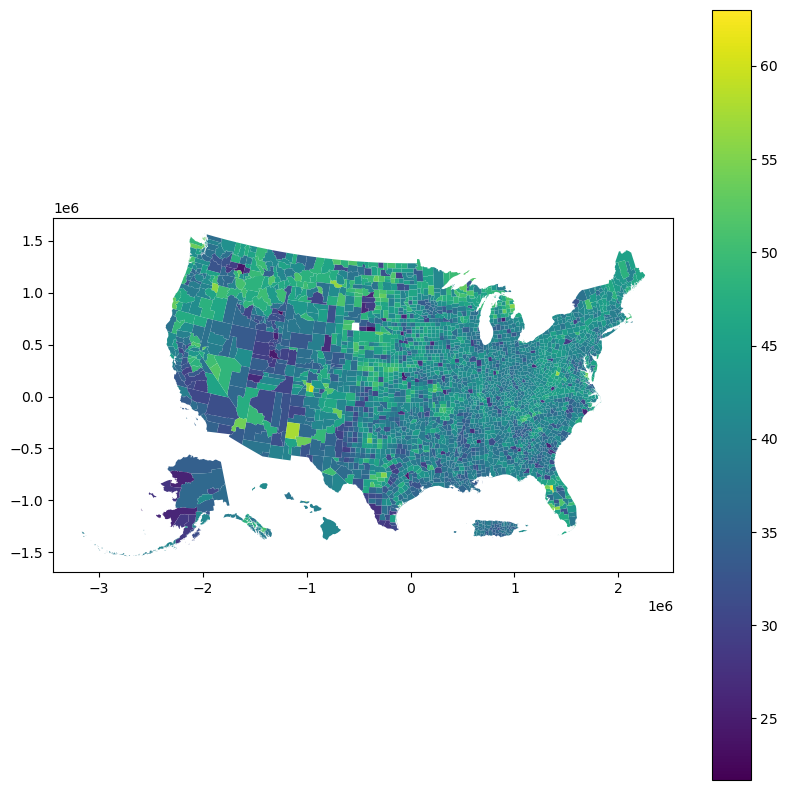

In [3]:
# Acquire attribute data
counties_detailed = get_census(dataset = "acs/acs5", # dataset name on the Census API you are connecting to; find datasets at https://api.census.gov/data.html
                        variables = acs_variables, # string (or list of strings) of desired vars. For the 2021 5-year ACS Data Profile, those variable IDs are found at https://api.census.gov/data/2021/acs/acs5/profile/variables.html.
                        year = 2012, # year of your data (or end-year for a 5-year ACS sample)
                        params = { # dict of query parameters to send to the API.
                          "for": "county:*"},#,
                          # "in": "state:36"},
                        guess_dtypes = True,
                        return_geoid = True)

# Acquire geographical data
counties_shp = counties(cb = True, year = 2021, cache = True)

# Join the data and map it
counties = counties_shp.merge(counties_detailed, how = "inner", on = "GEOID")
counties_pretty = shift_geometry(counties)
counties_pretty.plot(column = "B01002_001E", legend = True, figsize = (10, 10)); # believe plot() from gpd

# Checking my numbers match those in the paper

### Equivalency test with a toy example

In [17]:
def equiv(table1, sort1, column1, table2, sort2, column2):
    ''' 
    Tests two tables to see whether corresponding columns have equivalent entries.
    
    Parameters:
    table1 - the first table
    sort1 - the column in the first table to join by (str)
    column1 - the column(s) in the first table to test the values of (list of str) (should list analogous columns for columns2) 
    table2 - the second table
    sort2 - the column in the second table to join by (str)
    column2 - the column(s) in the second table to test the values of (list of str)
    '''
    # sort tables
    table1 = table1.sort_values(by = sort1).reset_index()
    table2 = table2.sort_values(by = sort2).reset_index()
    
    # rename column name in table2 to match that in table1
    for i in range(len(column1)):
        table2 = table2.rename(columns={column2[i]: column1[i]})

    # select the columns to test equivalency of
    table1 = table1[column1]
    table2 = table2[column1]
    
    # perform equivalency test
    test = table1.eq(table2)
    return test

In [6]:
# Create DataFrame from dictionary
data1 = {
    "id": [1,2,3],
    "calories": [420, 380, 390],
    "duration": [50, 40, 45]
}

data1 = pd.DataFrame(data1)

data2 = {
    "identifier": [1,2,3],
    "caloriesayy": [420, 380, 390],
    "durationyayy": [50, 40, 0]
}

data2 = pd.DataFrame(data2)

In [7]:
test = equiv(data1, "id", ["calories", "duration"], data2, "identifier", ["caloriesayy", "durationyayy"])
test#.sum()

,calories,duration
0,True,True
1,True,True
2,True,False


### Import raw ACS data from Spielman paper

In [62]:
# Bringing in data from the paper
import os

pd.set_option("chained_assignment", None)
make_strings = {'Geo_FIPS': object, 'Geo_STATE': object, 'Geo_COUNTY': object,
                'Geo_TRACT': object, 'Geo_CBSA': object, 'Geo_CSA': object}
# path = os.getcwd()
path = os.path.dirname(os.getcwd()) # if running from the 'code' directory
outPath=os.path.join(path,'data')
ipath = os.path.join(path,'data','input')
spath = os.path.join(path,'data','spatial')
acs = pd.read_csv(os.path.join(ipath, 'sovi_acs.csv'),
                  dtype=make_strings, skiprows=1,encoding='latin-1')

### Tests for equivalency
#### Median age

In [63]:
acs[['ACS12_5yr_B06001002']] # for some reason this is not in their data table, although it appears as a name of a column used in their code

KeyError: "None of [Index(['ACS12_5yr_B06001002'], dtype='object')] are in the [columns]"

In [92]:
test = equiv(counties_detailed, "GEOID", acs_variables, acs, "Geo_FIPS", spielman_acs_variables)
matching_cols = pd.DataFrame({"test": test.sum().eq(3221)}) # 3221 matches the number of rows
matching_cols.loc[~matching_cols.test] # identify the columns that have some data discrepencies

,test
B06007_005E,False
B06007_008E,False
B06007_001E,False
B25077_001E,False


Issues: they do not have ACS12_5yr_B06001002 in their dataset.
The following variables have some discrepancy between their dataset and mine.
- B25077_001E
- B06007_001E
- B06007_008E
- B06007_005E

In [129]:
pd.options.display.max_rows = 10
messed_up_indices = test[["B06007_005E", "B06007_008E", "B06007_001E", "B25077_001E"]].loc[~test.B06007_005E |~test.B06007_008E |~test.B06007_001E |~test.B25077_001E]
messed_up_indices#.index

,B06007_005E,B06007_008E,B06007_001E,B25077_001E
548,True,True,True,False
3143,False,False,False,True
3144,False,False,False,True
3145,False,False,False,True
3146,False,False,False,True
...,...,...,...,...
3216,False,False,False,True
3217,False,False,False,True
3218,False,False,False,True
3219,False,False,False,True


In [ ]:
# Inspect the indices that are mis-matched: work in progress
tygris_data = counties_detailed.sort_values(by = "GEOID")\
    .reset_index().loc[messed_up_indices.index]\
    [["GEOID", "B06007_005E", "B06007_008E", "B06007_001E", "B25077_001E"]]

spielman_data = acs.sort_values(by = "Geo_FIPS")\
    .reset_index().loc[messed_up_indices.index]\
    [["Geo_FIPS", "ACS12_5yr_B06007005", "ACS12_5yr_B06007008", "ACS12_5yr_B06007001", "ACS12_5yr_B25077001"]]

merged = tygris_data.merge(spielman_data, how = "inner", left_on = "GEOID", right_on = "Geo_FIPS")
merged

,GEOID,B06007_005E,B06007_008E,B06007_001E,B25077_001E,Geo_FIPS,ACS12_5yr_B06007005,ACS12_5yr_B06007008,ACS12_5yr_B06007001,ACS12_5yr_B25077001
0,15005,0.0,6.0,66.0,NaN,15005,0.0,6.0,66.0,NaN
1,72001,NaN,NaN,NaN,111500.0,72001,NaN,NaN,NaN,111500.0
2,72003,NaN,NaN,NaN,94100.0,72003,NaN,NaN,NaN,94100.0
3,72005,NaN,NaN,NaN,123000.0,72005,NaN,NaN,NaN,123000.0
4,72007,NaN,NaN,NaN,94600.0,72007,NaN,NaN,NaN,94600.0
...,...,...,...,...,...,...,...,...,...,...
74,72145,NaN,NaN,NaN,114400.0,72145,NaN,NaN,NaN,114400.0
75,72147,NaN,NaN,NaN,116600.0,72147,NaN,NaN,NaN,116600.0
76,72149,NaN,NaN,NaN,99500.0,72149,NaN,NaN,NaN,99500.0
77,72151,NaN,NaN,NaN,97200.0,72151,NaN,NaN,NaN,97200.0


It appears that all of the issues occured because of NaN values, and by inspection, we see that the NaN values all occur in analogous places in the different datasets (we can make this more robust if we'd like to). Great! Our ACS data matches Spielman's. Also, this shows us which variables we'll need to impute missing data for!

## **Remaining Issues:**
 - They do not have ACS12_5yr_B06001002 in their ACS dataset.
 - I cannot find SE_T02A_002 for the ACS on the census website
